# Notebook for simulation

We calculate lower bound for loss ratio using generated data. We consider the classifiers are of the form $$ f_{b, \theta} = \mathbb{1} \left( \beta+ \theta^T x > 0  \right). $$ For a given $\theta \in \mathbb{R}^2$ we calculate the bias $\beta$ in the following way: 
$$ \beta = \arg\min_{b} \sum_{i= 1}^n \left\{- y_i (b+\theta^Tx_i) + \log \left( 1+ e^{b + \theta^Tx_i} \right)\right\}. $$ 

First we load some required modules 

In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors

We now generate data. (skip this if you want to use pre-generated data)

In [2]:
os.system('python3 generate_data.py')

0

Let's plot the features

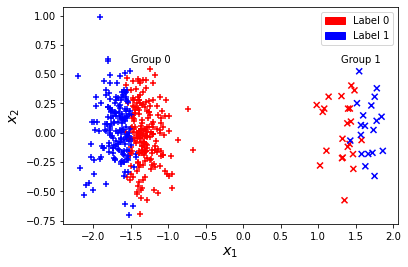

In [2]:
x = np.load('data/x.npy')
y = np.load('data/y.npy')
group = np.load('data/group.npy')
ind_zero = group == 0
ind_one = group == 1
col = np.zeros((x.shape[0], 4))
for i in range(x.shape[0]):
    if y[i]: 
        col[i, 2] = 1
    else:
        col[i, 0] = 1
    col[i, 3] = 1
plt.scatter(x[ind_zero, 0], x[ind_zero, 1], marker = 'x', color = col[ind_zero, :])
plt.scatter(x[ind_one, 0], x[ind_one, 1], marker = '+', color = col[ind_one, :])
plt.text(-1.5, 0.6, 'Group 0')
plt.text(1.3, 0.6, 'Group 1')
patch0 = mpatches.Patch(color='red', label = 'Label 0')
patch1 = mpatches.Patch(color='blue', label = 'Label 1')
plt.legend('best', handles = [patch0, patch1])
plt.xlabel('$x_1$', size = 'x-large')
plt.ylabel('$x_2$', size = 'x-large')
plt.savefig('plots/data.pdf')

The two groups differ mainly in first co-ordinate. So, from expert knowlegde we fix the protected direction to be $(1, 0)^T.$ We now calculate the lower bound for perturbed loss for each data points. The steps are given below:

(1) For a given weight $\theta$, the bias $\beta$ is calculated as described above.

(2) For a gien data point $(x^{(0)}, y)$ the objective is $$F(x) = -y (\beta + \theta^T x ) + \log \left( 1+ e^{\beta + \theta^Tx}\right) - \lambda \left[(\cos^2 \alpha) (x_1 - x_1 ^{(0)})^2 + (\sin^2 \alpha) (x_2 - x_2 ^{(0)})^2 \right],$$ where $\alpha$ is the perturbation angle for protected direction. 

(3) Approximate gradient flow is performed according to $$x \gets x + \text{learning_rate} * \nabla F(x) $$ for 200 steps with learining_rate $2e-2.$

(4) For a point $(x^{(0)}_i, y_i)$ loss ratio is then calculated as $r_i = \frac{-y_i (\beta + \theta^T x_i ) + \log \left( 1+ e^{\beta + \theta^Tx_i}\right)}{-y_i (\beta + \theta^T x^{(0)}_i ) + \log \left( 1+ e^{\beta + \theta^Tx_i^{(0)}}\right)}.$

(5) Finally, the lower bound is calculated as $$\text{lb}(\theta) = \text{mean}(r) - \frac{1.645}{\sqrt{n}}\text{std}(r).$$

We calculate the lower bounds over the grid $\theta \in \{-4, -3.6, ..., 4\} \times \{-4, -3.6, ..., 4\}$ for perturbation angles $\alpha = 0^o, 5^o, \& 10^o.$ (This might take some time. Skip this part if you want to use calculated lower bounds.)

In [ ]:
os.system('python3 loss_linear.py 0')
os.system('python3 loss_linear.py 5')
os.system('python3 loss_linear.py 10')

Finally, we plot the lower bounds.

/Users/smaity/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  """Entry point for launching an IPython kernel.


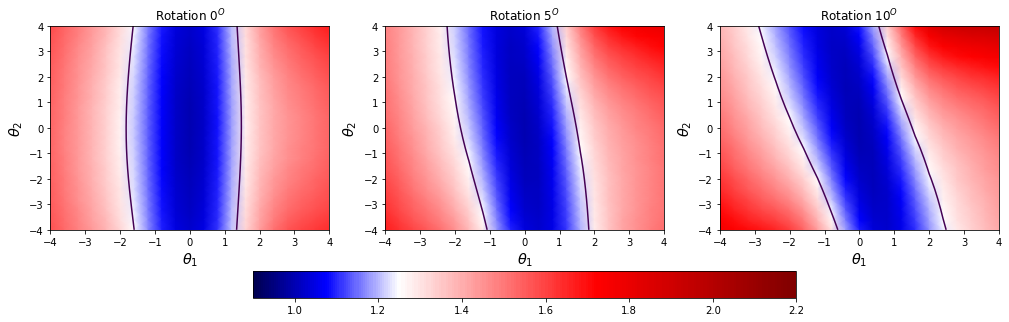

In [4]:
div_norm = colors.DivergingNorm(vmin=0.9, vcenter=1.25, vmax=2.2)
theta1 = np.arange(-4, 4.1, step = 0.4)
theta2 = np.arange(-4, 4.1, step= 0.4)
T2, T1 = np.meshgrid(theta2, theta1)

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = [17, 5])


b = np.load('data/test_stat_0.npy')
im0 = ax[0].pcolormesh(T1, T2, b, shading='gouraud', norm = div_norm, cmap = 'seismic')
ax[0].contour(T1, T2, b, levels = [1.25, ])
ax[0].set_title('Rotation $0^O$')
ax[0].set_xlabel('$\\theta_1$', fontsize = 'x-large')
ax[0].set_ylabel('$\\theta_2$' , fontsize = 'x-large')


b = np.load('data/test_stat_5.npy')
im1 = ax[1].pcolormesh(T1, T2, b, shading='gouraud', norm = div_norm, cmap = 'seismic')
ax[1].set_title('Rotation $5^O$')
ax[1].set_xlabel('$\\theta_1$', fontsize = 'x-large')
ax[1].set_ylabel('$\\theta_2$', fontsize = 'x-large')
ax[1].contour(T1, T2, b, levels = [1.25, ])

b = np.load('data/test_stat_10.npy')
im2 = ax[2].pcolormesh(T1, T2, b, shading='gouraud', norm = div_norm, cmap = 'seismic')
ax[2].set_title('Rotation $10^O$')
ax[2].set_xlabel('$\\theta_1$', fontsize = 'x-large')
ax[2].set_ylabel('$\\theta_2$', fontsize = 'x-large')
ax[2].contour(T1, T2, b, levels = [1.25, ])


fig.colorbar(im2, ax = ax, orientation='horizontal', fraction = 0.1)
plt.savefig('plots/mean_ratios.pdf')